# Laboration 2

### Import file and prepare the data


In [77]:
import csv

#Set filepath
datapoint_txt = 'D:\ITHS\Github\Python-Rasmus-Berghall\Laborations\Lab2\Data\datapoints.txt'


with open(datapoint_txt) as f_datapoints:
    datapoints_reader = csv.reader(f_datapoints)
    datapoints = [row for row in datapoints_reader]

# Remove column-info from input file
datapoints = datapoints[1:]

#Setting labels for slicing-indexes of sublist(datapoint) in datapoints for readability
#One datapoint consist of [width[0], height[1], label[2]]
width = 0
height = 1
label = 2

# Create list of datapoints width-values
datapoints_width = [float(point[width].strip()) for point in datapoints]

# Create list of datapoints height-values
datapoints_height = [float(point[height].strip()) for point in datapoints]



## Plotting from datapoints

Plotting out every point from input file 'datapoints.txt'  
where the x-axis is representing the width and the y-axis representing the height

Text(0.5, 0, 'Pokémon width')

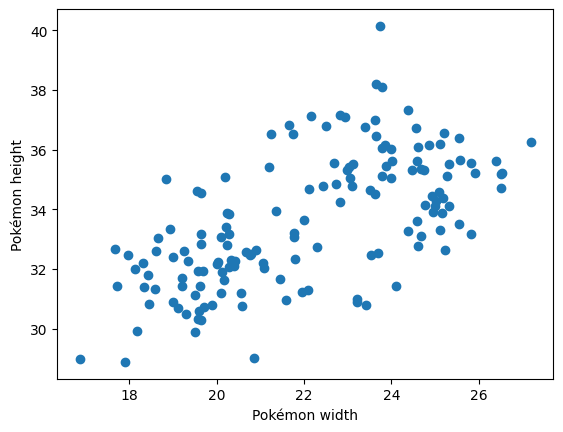

In [78]:
# Importera nödvändiga bibliotek 
import matplotlib.pyplot as plt

# Plot all points from datapoints
# The x-axis representing the width and y-axis representing the height
plt.scatter(datapoints_width, datapoints_height)
plt.ylabel('Pokémon height')
plt.xlabel('Pokémon width')



## Reading testpoints from file

Reading and preparing testpoints from file 'testpoints.txt'

In [79]:
#Set filepath
testpoints_txt = 'D:\ITHS\Github\Python-Rasmus-Berghall\Laborations\Lab2\Data\\testpoints.txt'

# Open and read the 'testpoints.txt'
with open(testpoints_txt) as f_testpoints: 
    testpoints_reader = csv.reader(f_testpoints)
    testpoints = [row for row in testpoints_reader]


# Removing first item (labels) from the list 
testpoints = testpoints[1:]


# Splitting values for width and height to seperate lists 
testpoint_width = [float(point[0][4:].strip()) for point in testpoints]
testpoint_height = [float(point[1][:-1].strip()) for point in testpoints]


## Define functions
#### Define function for taking input from user *(with fault handling)*


In [80]:
def user_input(prompt = "Input: "):
    
    while True: 
        try: 
            point = int(input(prompt).strip()) 
            if 0 < point: return point
            else: print("Your value is a negative value! Try again")                
        except ValueError:
            print("Your value is not a integer! Try again")
       


## Calculating the distance

Calculating the distance between the testpoints and datapoints and comparing to given answers in task.

Distance is calculated with the following formula:
```python

d = math.sqrt(x2-x1)**2 + (y2-y1)**2

```


In [81]:
import math

#Loop through the algorithm for every testpoint
for i in range(len(testpoints)):

    # Initialize distances and counter
    distances = []
    count = 0

    # Calculate shortest distance for every testpoint
    while count < len(datapoints):
            distances.append(math.sqrt((datapoints_width[count] - testpoint_width[i])**2 + (datapoints_height[count] - testpoint_height[i])**2) )
            count += 1
    
    # Find the index of the point where shortest distance is found
    index_min_value = distances.index(min(distances))
    
    # Check label in datapoints with saved index for smallest value and print result for each testpoint
    if int(datapoints[index_min_value][label]) == 1: 
        pokémon = 'Pikachu'
    else: 
        pokémon = 'Pichu'

    print(f"Sample with (width, height): ({testpoint_width[i]}, {testpoint_height[i]}) classified as {pokémon}")


Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


---
# Uppgifter

### 1. Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.  


In [82]:

#Get input from user, testpoint with width and height. 

print("""Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Your point should be a positive integer""") 
print()

user_width = user_input("Enter the first point (width): ")
user_height = user_input("Enter the second point (height): ")

# Initialize distances and counter
distances = []
count = 0

# Calculate the distancees between input point and datapoints,
# Save them to "distances"
while count < len(datapoints):
    distances.append(math.sqrt((datapoints_width[count] - user_width)**2 + (datapoints_height[count] - user_height)**2) )
    count += 1

# Find index of shortest distance from calculation
index_min_value = distances.index(min(distances))    

# Print the result. Pikachu = 1, Pichu =  0
if int(datapoints[index_min_value][label]) == 1: 
    pokémon = 'Pikachu'
else: 
    pokémon = 'Pichu'

print(f"Your point ({user_width}, {user_height}), (width, height): classified as {pokémon}")



Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Your point should be a positive integer

Your point (23, 34), (width, height): classified as Pikachu


#### 2. Klassificera input med dom 11 (10) närmsta punkterna istället för den närmsta punkten. Majoritetsröstning.

In [83]:

#Get input from user, testpoint with width and height. 

print("""Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Your point should be a positive integer""") 
print()

user_width = user_input("Enter the first point (width): ")
user_height = user_input("Enter the second point (height): ")

# Initialize labels, distances and counter
labels = []
distances = []
count = 0

# Calculate the distancees between input point and datapoints,
# Save them to "distances"
while count < len(datapoints):
    distances.append(math.sqrt((datapoints_width[count] - user_width)**2 + (datapoints_height[count] - user_height)**2) )
    count += 1

# Loop through distances and get label for the smallest distance each time
for i in range(11):
   
    # Find index of shortest distance from calculation
    index_min_value = distances.index(min(distances))
    
    # Add the label from smallest value to list with labels
    labels.append(int(datapoints[index_min_value][label]))

    # Remove smallest item from distances
    distances.pop(index_min_value)


# If sum of saved labels is greater than 6, it is majority Pikachu(1), else Pichu(0)
# Print the result

if sum(labels) >= 6: 
    pokémon = 'Pikachu'
else: 
    pokémon = 'Pichu'

print(f"Your point ({user_width}, {user_height}), (width, height): classified as {pokémon} based on the 10 nearest values")


Please enter a testpoint (width and height) of your pokémon
and we'll see if I can decide if it's Pikachu or Pichu.
Your point should be a positive integer

Your point (23, 34), (width, height): classified as Pichu based on the 10 nearest values


#### 3. Dela in ursprungsdatan slumpmässigt så att: 
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)


In [84]:

import random

# Seperate pikachu and pichu points into different lists
pikachu_points = [point for point in datapoints if int(point[label]) == 1]
pichu_points= [point for point in datapoints if int(point[label]) != 1]

# Initialize empty lists for randomized training and testdata.
training_data = []
test_data = []

# Choose 25 random points to use as testdata, "test_data".
# The rest is used as trainingdata, "training_data"
while len(pikachu_points) > 50:
    random_point = random.choice(pikachu_points)
    test_data.append(random_point)
    pikachu_points.pop(pikachu_points.index(random_point))

# Do the same as above for pichu_points
while len(pichu_points) > 50:
    random_point = random.choice(pichu_points)
    test_data.append(random_point)
    pichu_points.pop(pichu_points.index(random_point))


# When removed 50 points from pichu and pikachu points: 
# concatinate the remainders to training_data
training_data = pichu_points + pikachu_points

# Split the width and height to seperate lists
# For trainingdata:
training_data_width = [float(point[width].strip()) for point in training_data] 
training_data_height = [float(point[height].strip()) for point in training_data] 

# Same for testdata: 
test_data_width = [float(point[width].strip()) for point in test_data] 
test_data_height = [float(point[height].strip()) for point in test_data]



#### 4. Beräkna noggranheten genom följande formel: 
 
accuracy = (#TP+#TN)/(total)
 
|        | Pikachu Actual | Pichu Actual  |
|------------| -------------- | --------------|
| Pikachu Predicted | TP      |     FP        |  
| Pichu Predicted | FN      |     TN        |  


In [88]:
# Initialize variables for accuracy calculation
TP = 0
TN = 0


for i in range(len(test_data)):
    
    # Initialize distances and counter
    distances = []
    count = 0
    
    #Calculate the distance between the testdata and the trainingdata
    while count < len(training_data):
        distances.append(math.sqrt((training_data_width[count] - test_data_width[i])**2 + (training_data_height[count] - test_data_height[i])**2))
        count += 1


    #Find the index of the smallest value from calculation
    index_min_value = distances.index(min(distances))    
    
    # Set labels to variables
    # Label from algorithm: 
    distance_label = int(training_data[index_min_value][label])

    # Label from testdata (answer):
    actual_label = int(test_data[i][label])

    # Check for TP, TN.
    # If algorithm chose pikachu and answer is pikachu it is a TP (True Positive).
    # If algrithm chose pichu and answer is pichu it is a TN (True Negative).
    if distance_label == 1 and actual_label == 1: 
        TP += 1

    if distance_label == 0 and actual_label == 0: 
        TN += 1

    # Set pokémon to correct value based on label (for print)
    if distance_label == 1: 
        pokémon = 'Pikachu'
    else: 
        pokémon = 'Pichu'
        

    if actual_label == 1:
        answer = 'Pikachu'
    else: 
        answer = 'Pichu'

    
    print(f'Algorithm classified testpoint as: {pokémon}, the correct classification is: {answer}')


# Beräkna och skriva ut accuracy i procent för aktuell test och träningsdata
accuracy = (TP + TN) / 50
print(f'\n{accuracy :.2%}')

Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pichu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algorithm classified testpoint as: Pikachu, the correct classification is: Pikachu
Algori

## Run task 3 and 4, 10 times
Save the accuracy of each run

In [86]:
# Define list to save accuracy for every test
accuracy = []
number_of_tries = 10

# Run task 3 and 4 10 times
for j in range(number_of_tries):

# Seperate pikachu and pichu points into different lists
    pikachu_points = [point for point in datapoints if int(point[label]) == 1]
    pichu_points= [point for point in datapoints if int(point[label]) != 1]

    # Initialize empty lists for randomized training and testdata.
    training_data = []
    test_data = []

    # Choose 25 random points to use as testdata, "test_data".
    # The rest is used as trainingdata, "training_data"
    while len(pikachu_points) > 50:
        random_point = random.choice(pikachu_points)
        test_data.append(random_point)
        pikachu_points.pop(pikachu_points.index(random_point))

    # Do the same as above for pichu_points
    while len(pichu_points) > 50:
        random_point = random.choice(pichu_points)
        test_data.append(random_point)
        pichu_points.pop(pichu_points.index(random_point))


    # When removed 50 points from pichu and pikachu points: 
    # concatinate the remainders to training_data
    training_data = pichu_points + pikachu_points

    # Split the width and height to seperate lists
    # For trainingdata:
    training_data_width = [float(point[width].strip()) for point in training_data] 
    training_data_height = [float(point[height].strip()) for point in training_data] 

    # Same for testdata: 
    test_data_width = [float(point[width].strip()) for point in test_data] 
    test_data_height = [float(point[height].strip()) for point in test_data]


    # Initialize variables for accuracy calculation
    TP = 0
    TN = 0
    

    for i in range(len(test_data)):
        
        # Initialize distances and counter
        distances = []
        count = 0
        
        #Calculate the distance between the testdata and the trainingdata
        while count < len(training_data):
            distances.append(math.sqrt((training_data_width[count] - test_data_width[i])**2 + (training_data_height[count] - test_data_height[i])**2))
            count += 1


        #Find the index of the smallest value from calculation
        index_min_value = distances.index(min(distances))    
        
        # Set labels to variables
        # Label from algorithm: 
        distance_label = int(training_data[index_min_value][label])

        # Label from testdata (answer):
        actual_label = int(test_data[i][label])

        # Check for TP, TN.
        # If algorithm chose pikachu and answer is pikachu it is a TP.
        # If algrithm chose pichu and answer is pichu it is a TN.
        if distance_label == 1 and actual_label == 1: 
            TP += 1

        if distance_label == 0 and actual_label == 0: 
            TN += 1

        # Set pokémon to correct value based on label (for print)
        if distance_label == 1: 
            pokémon = 'Pikachu'
        else: 
            pokémon = 'Pichu'
            

        if actual_label == 1:
            answer = 'Pikachu'
        else: 
            answer = 'Pichu'

        
        #print(f'Algorithm classified testpoint as: {pokémon}, the correct classification is: {answer}')


# Beräkna och skriva ut accuracy för aktuell test- och träningsdata
    
    accuracy.append((TP + TN) / 50)

print(accuracy)



[0.98, 0.96, 0.92, 0.98, 0.96, 0.96, 0.92, 0.98, 0.98, 0.98]


### Plot the accuracy and report the average accuracy

The average accuracy over 10 tries is 0.962


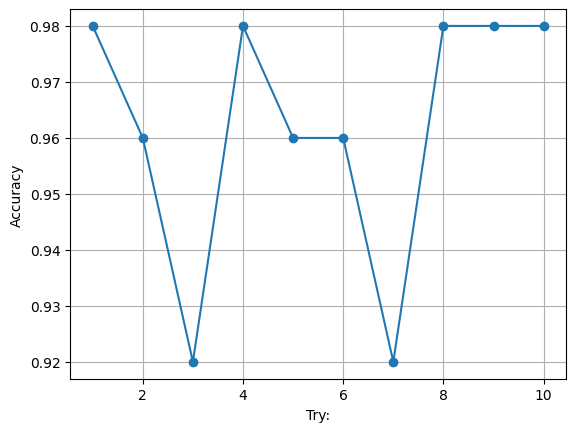

In [87]:
# Plot the graph for accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, marker= 'o')
plt.grid()
plt.xlabel("Try:")
plt.ylabel("Accuracy")

# Calculate average accuracy and print it out
average = sum(accuracy) / len(accuracy)

print(f'The average accuracy over {number_of_tries} tries is {average :.3}')